In [2]:
import numpy as np
from random import random
import matplotlib.pyplot as plt

def emd(P,Q):
    assert len(P) == len(Q)
    EMD = [0]
    for i in range(len(P)):
        EMD.append(P[i]-Q[i]+EMD[-1])
    return sum([abs(d) for d in EMD])

def drift(n):
    return 1/(np.e * np.math.factorial(n))

def poisson(l,n):
    return (np.power(l,n)*np.exp(-l))/np.math.factorial(n)

def getPopOffDist(X,R,dt,maxN):
    assert len(X) == len(R)
    L = [np.exp(p*dt)-1 for p in R]
    aveL = sum([x*l for x,l in zip(X,L)])
    L2 = [(l)/aveL for l in L]
    Dists = [[poisson(l,n) for n in range(maxN)] for l in L2]
    Dists_T = list(zip(*Dists))
    result = [sum([(x*f) for x,f in zip(X,F)]) for F in Dists_T]
    print(sum(result))
    assert np.isclose(sum(result),1)
    return result
    

In [23]:
#observe how much time?
dt = 1

#how many offspring is enough to check?
maxN = 100
driftRef = [drift(n) for n in range(maxN)]

#What are the densities of each type?
X = [0.5,0.5]
# or 
# numFakeTypes = 10
# temp = [random() for _ in range(numFakeTypes)]
# tempS = sum(temp)
# X = [t/tempS for t in temp]

assert np.isclose(sum(X),1)

#What are the growth rates?
R = [2,1]
# or
# R = [2 for _ in range(numFakeTypes)]

In [24]:
offspringDistribution = getPopOffDist(X,R,dt,maxN)
print()
print(offspringDistribution)

1.0000000000000004

[0.43063842836329186, 0.3016677789974348, 0.1578153083632094, 0.07162003459417553, 0.027023790261167812, 0.008417087039918026, 0.002203885477734892, 0.0004957918964034391, 9.76552529681923e-05, 1.710070512612535e-05, 2.695225102743489e-06, 3.8617912125114185e-07, 5.072189030849621e-08, 6.149507788862022e-09, 6.923101568121827e-10, 7.27441134331598e-11, 7.165826544398626e-12, 6.643635406090107e-13, 5.817303297158554e-14, 4.825657868055804e-15, 3.802900422844689e-16, 2.854197889273463e-17, 2.0447952207890578e-18, 1.4012331623356485e-19, 9.202113527711019e-21, 5.80144260262268e-22, 3.51682755461281e-23, 2.0529375146796117e-24, 1.1555962429484755e-25, 6.280533622355334e-27, 3.2996183625112457e-28, 1.6776078111088231e-29, 8.26283124094894e-31, 3.946420556009156e-32, 1.8294176684449946e-33, 8.238217361500263e-35, 3.60677596773099e-36, 1.5364055411644396e-37, 6.37251240862383e-39, 2.5753395911825086e-40, 1.01475905341717e-41, 3.9009240928287596e-43, 1.4638838878326746e-44,

In [25]:
print(emd(driftRef,offspringDistribution))
print(np.isclose(emd(driftRef,offspringDistribution),0))

0.12551797438369922
False


1.0000000000000002
1.0
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0
0.9999999999999999
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999998


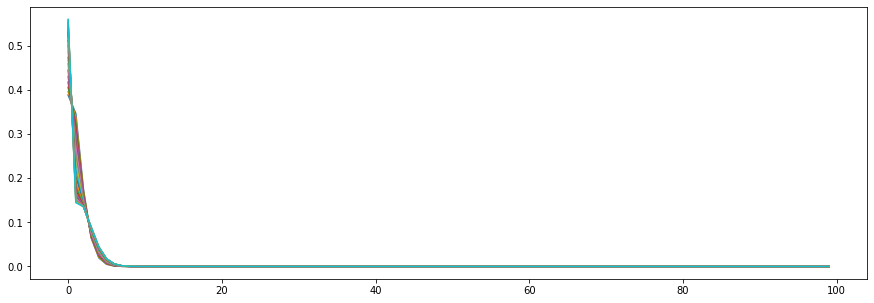

In [19]:
plt.figure(figsize=(15,5))
for t in np.arange(0.01,10,0.5):
    O = getPopOffDist(X,R,t,maxN)
    D = emd(driftRef,O)
#     plt.scatter([t],[D])
    plt.plot(O)
plt.show()

1.0


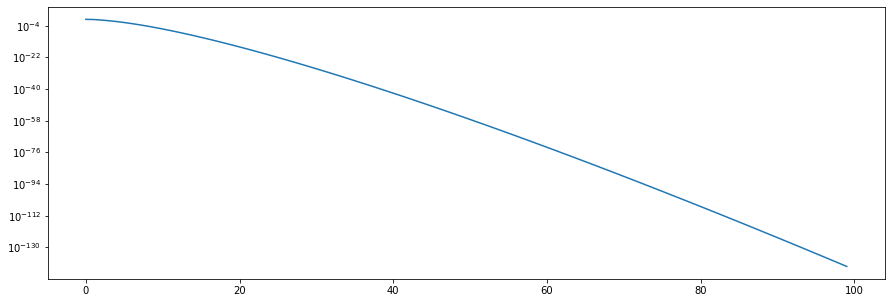

In [7]:
plt.figure(figsize=(15,5))

O = getPopOffDist(X,R,1,maxN)
# D = emd(driftRef,O)

plt.plot(O)
plt.yscale("log")
plt.show()